<a href="https://colab.research.google.com/github/AIcaspianc/Banking-Projects/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study: Fraud Detection in Banking Systems**

## **Research Conducted by**  
### **Mehdi Khaledi, Data Scientist, Nov 2024**

This case study explores the development of a robust fraud detection system tailored to the banking sector. In adherence to **Non-Disclosure Agreement (NDA)** obligations, the dataset utilized in this research is synthetic and exclusively designed for academic and feasibility study purposes. As online financial transactions grow in complexity and fraudulent activities become increasingly sophisticated, this study seeks to design a scalable and high-performing machine learning solution.

The synthetic dataset comprises **10,000 records** with a significant class imbalance, reflecting the real-world challenge of fraudulent transactions forming a minority. The study's primary objective is to achieve **high recall and precision** in fraud detection, while minimizing **false positives** and **false negatives** to balance fraud prevention with a seamless customer experience.

---

## **Approaches**

The study explores five machine learning approaches to address the challenges of Fraud Detection in Banking Systems:

1. **Logistic Regression**:
   - Established as a baseline model.
   - Simple and interpretable but limited in capturing non-linear patterns.

2. **Random Forest**:
   - An ensemble-based model that effectively captured complex patterns.
   - Demonstrated balanced performance with improved recall and precision.

3. **XGBoost**:
   - Achieved the highest recall for fraud detection.
   - Minimized false negatives but resulted in slightly higher false positives than Random Forest.

4. **Support Vector Machines (SVM)**:
   - Optimized with PCA for computational efficiency.
   - Struggled with class imbalance, leading to lower overall performance.

5. **Neural Networks**:
   - Built with dropout and L2 regularization to mitigate overfitting.
   - Showed potential but failed to generalize effectively due to class imbalance and overfitting issues.

Each approach was rigorously compared using key metrics such as **precision**, **recall**, **F1-score**, and **AUC-ROC**, with a primary focus on minimizing false negatives to improve fraud detection effectiveness.


## Load the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the specified path
file_path = "/content/drive/MyDrive/Colab Notebooks/7 Projects/Fraud Detection/Fraud_Detection_Dataset.csv"  # Path to the dataset
df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame

# Inspect the first few rows of the dataset
df.head()  # Display the first 5 rows to understand the structure of the data

# Check for missing values and data types
df.info()  # Summarize the dataset, including data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  object 
 1   CustomerID            10000 non-null  object 
 2   TransactionAmount     10000 non-null  float64
 3   TransactionDateTime   10000 non-null  object 
 4   TransactionType       10000 non-null  object 
 5   MerchantCategory      10000 non-null  object 
 6   DeviceType            10000 non-null  object 
 7   IP_Address            10000 non-null  object 
 8   Geolocation           10000 non-null  object 
 9   AccountBalance        10000 non-null  float64
 10  IsHighRiskCountry     10000 non-null  bool   
 11  NumberOfFailedLogins  10000 non-null  int64  
 12  IsNewPayee            10000 non-null  bool   
 13  TransactionChannel    10000 non-null  object 
 14  HistoricalFraudScore  10000 non-null  float64
 15  FraudLabel          

## Observation

# Dataset Overview and Observations

## Dataset Information
- **Rows:** 10,000  
- **Columns:** 16  
- **Missing Values:** None (all columns have complete data).  
- **Memory Usage:** 1.1 MB (efficient given dataset size).  

## Data Types
- **Numerical (float64):** `TransactionAmount`, `AccountBalance`.  
- **Integer (int64):** `NumberOfFailedLogins`.  
- **Boolean (bool):** `IsHighRiskCountry`, `IsNewPayee`.  
- **Categorical/Textual (object):** `TransactionID`, `CustomerID`, `Geolocation`.  
- **Datetime (convertible):** `TransactionDateTime` (currently `object`, should be converted to datetime format).

## Key Columns
- **Target Variable:** `FraudLabel`  
  - Binary: `0` (legitimate), `1` (fraud).  
- **Notable Features:**  
  - `TransactionAmount`  
  - `IsHighRiskCountry`  
  - `HistoricalFraudScore`

## Recommendations
1. Convert `TransactionDateTime` to a proper datetime format.  
2. Perform exploratory data analysis (EDA) with visualizations and summary statistics to identify patterns or anomalies.  
3. Focus on the relationship between `FraudLabel` and key features like `TransactionAmount` and `IsHighRiskCountry`.  


## Distribution of Fraudulent Transactions

<ipython-input-4-f6d0e04b8653>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")  # Create the barplot


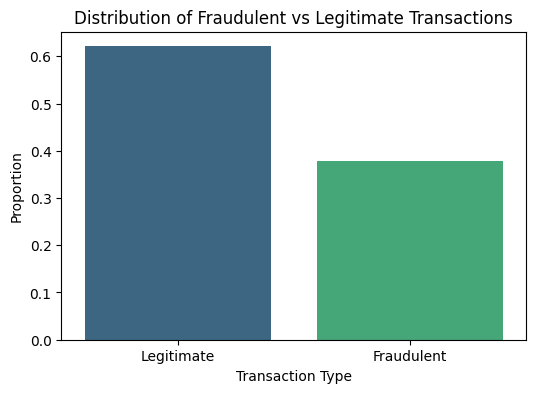

In [ ]:
# Calculate the proportion of fraudulent and legitimate transactions
fraud_counts = df['FraudLabel'].value_counts(normalize=True)  # Normalize gives proportions instead of counts

# Create a bar chart to visualize the proportion of each label
plt.figure(figsize=(6, 4))  # Set the figure size for better visualization
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")  # Create the barplot
plt.title("Distribution of Fraudulent vs Legitimate Transactions")  # Add a title for context
plt.xticks([0, 1], ["Legitimate", "Fraudulent"])  # Label the x-axis values for better readability
plt.ylabel("Proportion")  # Label for y-axis
plt.xlabel("Transaction Type")  # Label for x-axis
plt.show()  # Display the plot


## Observation


# Observations: Distribution of Fraudulent vs Legitimate Transactions

## Key Insights
- **Proportion of Transaction Types:**  
  - Legitimate transactions constitute ~60%.  
  - Fraudulent transactions account for ~40%.  

## Class Distribution
- Unlike typical fraud datasets (fraud rate often <5%), this dataset has a balanced distribution (~40% fraud).  
- Such balance reduces the need for class-balancing techniques like oversampling or undersampling.  

## Implications for Fraud Detection
- The high fraud rate suggests either simulated data or a deliberate focus on fraudulent patterns for analysis.  
- This distribution supports robust model training and aids in better understanding of fraud characteristics.  

## Modeling Considerations
- The relatively balanced dataset minimizes the risk of model overfitting to legitimate transactions.  
- Enables direct application of machine learning algorithms without extensive rebalancing efforts.

## Recommendations
1. Investigate features that differentiate fraudulent and legitimate transactions (e.g., transaction amount, failed logins, geographic location).  
2. Perform feature engineering and exploratory data analysis (EDA) for deeper insights.  


## Transaction Amount Distribution

<ipython-input-5-b095b7e6da48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="FraudLabel", y="TransactionAmount", data=df, palette="viridis")  # Generate the boxplot


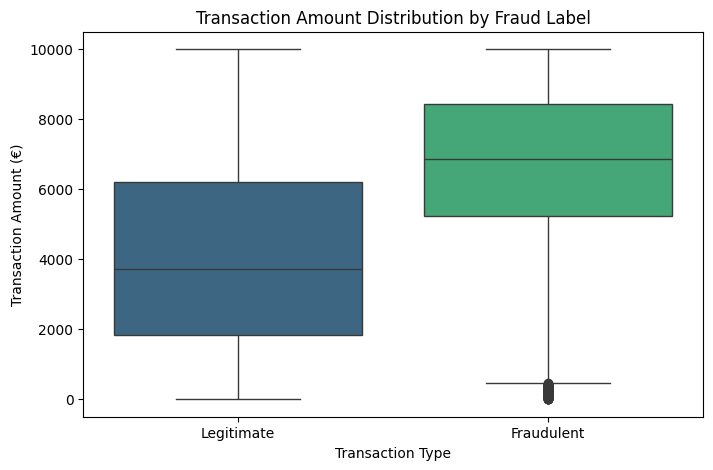

In [ ]:
# Create a boxplot to analyze the distribution of transaction amounts by fraud label
plt.figure(figsize=(8, 5))  # Set figure size
sns.boxplot(x="FraudLabel", y="TransactionAmount", data=df, palette="viridis")  # Generate the boxplot
plt.title("Transaction Amount Distribution by Fraud Label")  # Add a title for context
plt.xticks([0, 1], ["Legitimate", "Fraudulent"])  # Provide readable x-axis labels
plt.ylabel("Transaction Amount (€)")  # Label the y-axis to indicate the unit
plt.xlabel("Transaction Type")  # Label the x-axis
plt.show()  # Display the plot


## Observation

# Observations: Transaction Amount Distribution by Fraud Label

## Key Insights
- **Central Tendency:**  
  - The median transaction amount for fraudulent transactions is approximately €6,000, which is higher than the €4,000 median for legitimate transactions.

- **Spread and Variability:**  
  - Fraudulent transactions have a narrower interquartile range (IQR), indicating less variability in transaction amounts.  
  - Legitimate transactions show a wider spread, reflecting more variability.  

- **Outliers:**  
  - Fraudulent transactions exhibit a few low-value outliers, possibly indicative of test fraud attempts.  
  - Legitimate transactions do not display any significant outliers.  

- **Maximum Transaction Amount:**  
  - Both fraudulent and legitimate transactions reach a similar maximum value of approximately €10,000, suggesting a dataset-imposed cap.  

## Implications for Fraud Detection
- Transaction amount is a key feature for distinguishing fraudulent activity, as fraudulent transactions tend to have higher and more consistent amounts.  
- Low-value fraudulent outliers emphasize the need for complementary features to capture subtle fraud attempts.  

## Recommendations
1. Integrate `TransactionAmount` with additional features such as `IsHighRiskCountry` or `NumberOfFailedLogins` to enhance fraud detection.  
2. Explore relationships between `TransactionAmount` and categorical features like `MerchantCategory` or `TransactionChannel` for deeper insights.  


## Analyzing High-Risk Countries

<ipython-input-6-5f4bf8cfb07f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_country_fraud.index, y=risk_country_fraud.values, palette="viridis")  # Generate the barplot


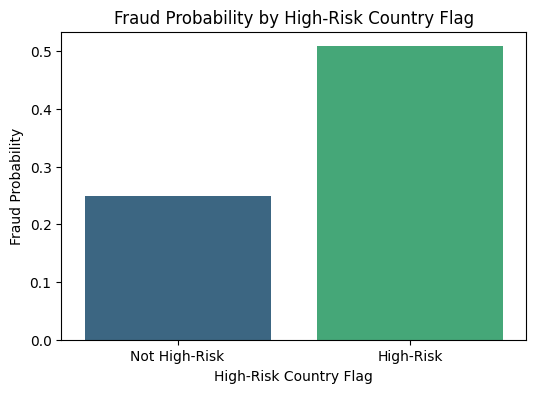

In [ ]:
# Calculate the average fraud probability for high-risk and non-high-risk countries
risk_country_fraud = df.groupby("IsHighRiskCountry")["FraudLabel"].mean()  # Group by risk status and compute mean fraud

# Create a bar chart to visualize fraud probabilities by country risk level
plt.figure(figsize=(6, 4))  # Set figure size
sns.barplot(x=risk_country_fraud.index, y=risk_country_fraud.values, palette="viridis")  # Generate the barplot
plt.title("Fraud Probability by High-Risk Country Flag")  # Add a title for context
plt.xticks([0, 1], ["Not High-Risk", "High-Risk"])  # Label the x-axis categories
plt.ylabel("Fraud Probability")  # Label for y-axis
plt.xlabel("High-Risk Country Flag")  # Label for x-axis
plt.show()  # Display the plot


## Observation

# Observations: Fraud Probability by High-Risk Country Flag

## Key Insights
- **Fraud Probability in High-Risk Countries:**  
  - Transactions from high-risk countries have a fraud probability of nearly 50%, indicating that almost half of such transactions are fraudulent.  
  - This makes the `IsHighRiskCountry` feature a strong predictor for fraud detection.

- **Fraud Probability in Non-High-Risk Countries:**  
  - Fraud probability in non-high-risk countries is significantly lower, around 20-25%.  
  - Fraud still occurs in these regions but is less frequent compared to high-risk areas.  

- **Magnitude of Difference:**  
  - The fraud probability is approximately twice as high in high-risk countries compared to non-high-risk countries.  
  - This substantial difference underscores the importance of this feature in identifying fraud.

## Implications for Fraud Detection
- The `IsHighRiskCountry` feature should be prioritized during feature selection and engineering.  
- Transactions flagged as high-risk require closer scrutiny during real-time fraud detection to minimize financial losses.

## Recommendations
1. Analyze interactions between `IsHighRiskCountry` and other features, such as `TransactionAmount` or `TransactionChannel`, for enhanced insights.  
2. Ensure the `IsHighRiskCountry` feature is appropriately weighted during model training to improve detection accuracy.  


## Number of Failed Logins

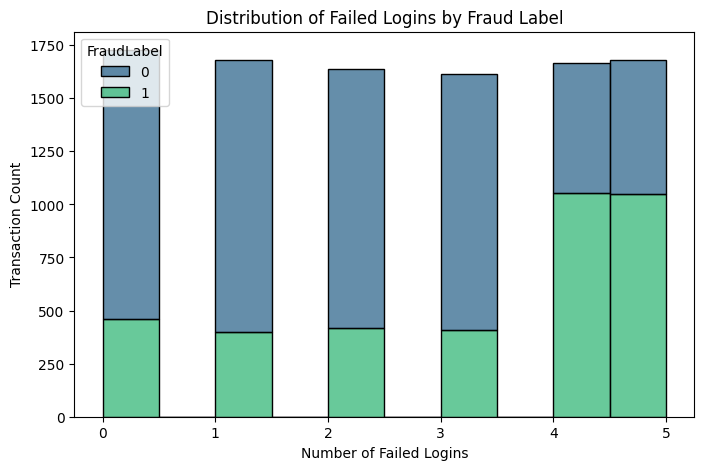

In [ ]:
# Create a histogram to analyze failed login attempts by fraud label
plt.figure(figsize=(8, 5))  # Set figure size
sns.histplot(data=df, x="NumberOfFailedLogins", hue="FraudLabel", multiple="stack", palette="viridis", bins=10)
# Plot a stacked histogram with fraud label as the hue
plt.title("Distribution of Failed Logins by Fraud Label")  # Add a title for context
plt.xlabel("Number of Failed Logins")  # Label for x-axis
plt.ylabel("Transaction Count")  # Label for y-axis
plt.show()  # Display the plot


## Observation

# Observations: Distribution of Failed Logins by Fraud Label

## Key Insights
- **Fraud Proportion Increases with Failed Logins:**  
  - Transactions with 4 or more failed logins exhibit a sharp increase in the proportion of fraud.  
  - Fraudulent transactions dominate at 5 failed logins, indicating a strong correlation between repeated login failures and fraud likelihood.  

- **Legitimate Transactions Decrease with Failed Logins:**  
  - Legitimate transactions form the majority for 0-3 failed logins.  
  - As the number of failed logins increases, the proportion of legitimate transactions decreases significantly.  

- **Threshold Effect:**  
  - A tipping point is observed at 4 failed logins, where fraudulent transactions nearly equal legitimate ones.  
  - This suggests a potential account compromise or persistent attempts to access accounts fraudulently.  

## Implications for Fraud Detection
- The `NumberOfFailedLogins` feature is a critical predictor for fraud detection.  
- Threshold-based rules, such as flagging accounts after 3 or more failed login attempts, could be effective for early fraud prevention.  

## Recommendations
1. Analyze interactions between `NumberOfFailedLogins` and other features, such as `TransactionAmount` or `IsHighRiskCountry`, to uncover deeper insights.  
2. Include `NumberOfFailedLogins` in machine learning models and assign high feature importance to enhance fraud detection accuracy.  
3. Develop real-time alerts and preventive measures based on failed login thresholds.  


## Temporal Analysis

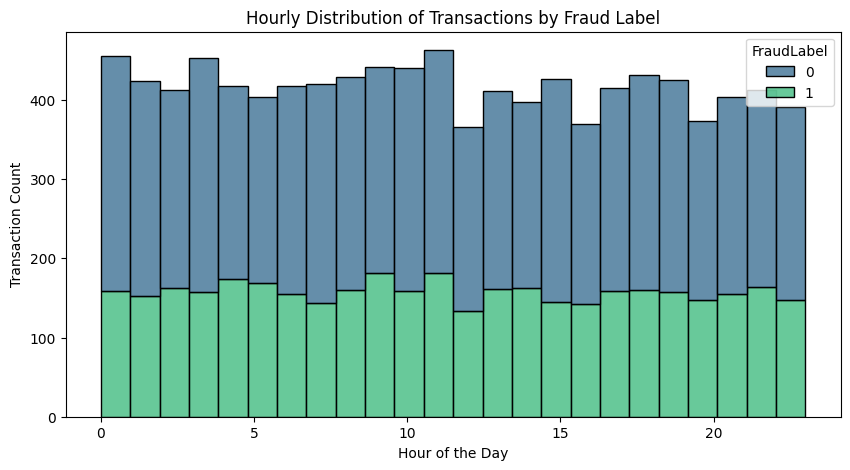

In [ ]:
# Extract the hour from the transaction timestamp
df['TransactionDateTime'] = pd.to_datetime(df['TransactionDateTime'])  # Ensure the column is in datetime format
df['Hour'] = df['TransactionDateTime'].dt.hour  # Extract the hour of the transaction

# Create a histogram to analyze hourly transaction patterns
plt.figure(figsize=(10, 5))  # Set figure size
sns.histplot(data=df, x="Hour", hue="FraudLabel", multiple="stack", palette="viridis", bins=24)
# Plot a stacked histogram with fraud label as the hue and 24 bins (one for each hour)
plt.title("Hourly Distribution of Transactions by Fraud Label")  # Add a title for context
plt.xlabel("Hour of the Day")  # Label for x-axis
plt.ylabel("Transaction Count")  # Label for y-axis
plt.show()  # Display the plot


## Observation

# Observations: Hourly Distribution of Transactions by Fraud Label

## Key Insights
- **Consistent Fraud Proportion Across Hours:**  
  - Fraudulent transactions (green bars) maintain a consistent proportion (~20-25%) throughout the day.  
  - No specific hour exhibits a significant increase or decrease in fraud, suggesting time of day is not a strong determinant of fraudulent activity.

- **Higher Volume of Transactions During Certain Hours:**  
  - Transaction volume is slightly higher during business hours (8 AM to 6 PM), with notable peaks around 10 AM and 4 PM.  
  - This aligns with user behavior patterns, where transactions are more frequent during working hours.

- **Legitimate Transactions Dominate Throughout:**  
  - Legitimate transactions (blue bars) consistently outnumber fraudulent ones across all hours.  
  - Despite this, the consistent fraud proportion underscores the importance of monitoring transactions at all times.

## Potential Implications
- Time of day, as a standalone feature, may not be a strong predictor for fraud detection.  
- Temporal insights, such as time zones or transaction time differences (e.g., compared to user login times), might enhance fraud detection when combined with other features.

## Recommendations
1. Investigate interactions between transaction time and other features, such as `IsHighRiskCountry` or `TransactionChannel`, for deeper insights.  
2. Incorporate temporal features into machine learning models but ensure they are paired with other strong predictors like `TransactionAmount` and `NumberOfFailedLogins`.  


# Approaches

# Machine Learning Approaches for Fraud Detection

## Overview of Models
1. **Logistic Regression:**  
   - Simple and interpretable, making it a suitable baseline model.  
   - Provides a clear understanding of feature importance and relationships.  

2. **Random Forest:**  
   - A robust ensemble method that effectively handles non-linear relationships and class imbalance.  
   - Offers good performance and feature importance insights.  

3. **Gradient Boosting (XGBoost):**  
   - A highly efficient tree-based model optimized for imbalanced datasets.  
   - Widely used in fraud detection for its ability to maximize accuracy while minimizing false negatives.  

4. **Neural Networks:**  
   - Suitable for capturing complex patterns and interactions.  
   - Requires more data preprocessing and careful tuning but can provide significant performance improvements for large datasets.  


# First Approach: Logistic Regression

## Why Logistic Regression?
- **Interpretability:**  
  - Simple and easy to understand, making it ideal for a baseline model.  
- **Quick Baseline:**  
  - Helps establish initial performance metrics for comparison with more complex models.  
- **Scalability:**  
  - Works well with linearly separable data and scales efficiently.  

## Step-by-Step Implementation

1. **Import Libraries and Prepare the Dataset:**  
   - Data is split into training and testing sets.  
   - Features are scaled to improve model performance and convergence.  

2. **Train Logistic Regression Model:**  
   - The model is trained on the training set to learn patterns in the data.  
   - Performance is evaluated using the test set.  

3. **Evaluate Performance:**  
   - Metrics used:  
     - **Accuracy:** Overall correctness of predictions.  
     - **Precision:** Ability to avoid false positives.  
     - **Recall:** Ability to detect true fraud cases.  
     - **F1-Score:** Balance between precision and recall.  
   - Confusion matrix analyzed to understand classification errors in detail.  

## Observations
- Logistic Regression provides a solid starting point for evaluating baseline performance.  
- The metrics and confusion matrix offer insights into model strengths and areas for improvement, paving the way for more advanced methods.  


In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Step 1: Prepare the Dataset
# Define features (X) and target (y)
X = df.drop(['TransactionID', 'FraudLabel', 'TransactionDateTime'], axis=1)  # Drop non-numeric or unnecessary columns
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/one-hot encoding
y = df['FraudLabel']  # Define the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Test size is 30%; stratify ensures the class distribution is maintained across train and test sets

# Step 2: Feature Scaling
scaler = StandardScaler()  # Initialize the standard scaler
X_train = scaler.fit_transform(X_train)  # Scale the training features
X_test = scaler.transform(X_test)  # Scale the testing features using the same scaler

# Step 3: Train the Logistic Regression Model
logistic_model = LogisticRegression()  # Initialize the logistic regression model
logistic_model.fit(X_train, y_train)  # Train the model on the training data

# Step 4: Model Evaluation
# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Display accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression: {accuracy:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79      1863
           1       0.68      0.40      0.50      1137

    accuracy                           0.70      3000
   macro avg       0.70      0.64      0.64      3000
weighted avg       0.70      0.70      0.68      3000

Confusion Matrix:
 [[1655  208]
 [ 687  450]]
Accuracy of Logistic Regression: 0.70


# Explanation of the Code: Logistic Regression Implementation

## Feature Preparation
- **Dropping Irrelevant Columns:**  
  - Removed `TransactionID` and `TransactionDateTime` as they do not contribute to the prediction task.  
- **Encoding Categorical Variables:**  
  - Applied one-hot encoding to convert categorical features into numeric format for compatibility with the logistic regression model.  

## Data Splitting
- **Train-Test Split:**  
  - Split the dataset into 70% training and 30% testing to ensure unbiased model evaluation.  
- **Stratified Split:**  
  - Maintained the ratio of fraudulent to legitimate transactions across training and testing sets to ensure consistency.  

## Scaling
- **Standardization:**  
  - Standardized the features to ensure equal contribution and improved performance for logistic regression.  

## Training
- **Model Fitting:**  
  - Trained the logistic regression model on the scaled training dataset.  

## Evaluation
1. **Classification Report:**  
   - Detailed performance metrics for each class:  
     - **Precision:** How effectively the model avoids false positives.  
     - **Recall:** How effectively the model detects true positives.  
     - **F1-Score:** Balances precision and recall.  
     - **Support:** The number of true instances for each class.  
   
2. **Confusion Matrix:**  
   - Summarized the results into:  
     - True Positives (TP)  
     - True Negatives (TN)  
     - False Positives (FP)  
     - False Negatives (FN)  

3. **Accuracy Score:**  
   - Provided a general measure of model correctness, though less informative for imbalanced datasets.  

## Observations
- These steps ensure a thorough and fair evaluation of the logistic regression model, setting the stage for comparisons with more advanced approaches.  


# Observation and Interpretation: Logistic Regression Results

## Classification Report

### Class 0 (Legitimate Transactions)
- **Precision:** 0.71  
  - Of all transactions predicted as legitimate, 71% were correctly classified.  
- **Recall:** 0.89  
  - The model successfully identified 89% of legitimate transactions.  
- **F1-Score:** 0.79  
  - Indicates a balance between precision and recall. High recall reflects strong performance in identifying legitimate transactions.

### Class 1 (Fraudulent Transactions)
- **Precision:** 0.68  
  - Of all transactions predicted as fraud, 68% were indeed fraudulent.  
- **Recall:** 0.40  
  - The model detected only 40% of fraudulent transactions, missing 60% of fraud cases.  
- **F1-Score:** 0.50  
  - Low F1-score highlights suboptimal performance in fraud detection, driven by poor recall.

### Overall Metrics
- **Accuracy:** 70%  
  - While 70% of transactions were classified correctly, accuracy is not a reliable metric for imbalanced datasets due to its bias toward the majority class.
- **Macro Average:**  
  - **F1-Score:** 0.64  
  - Equal weight given to both classes, indicating moderate performance.
- **Weighted Average:**  
  - **F1-Score:** 0.68  
  - Accounts for the larger number of legitimate transactions, slightly improving the overall score.

## Confusion Matrix
- **True Positives (450):** Fraudulent transactions correctly classified as fraud.  
- **True Negatives (1655):** Legitimate transactions correctly classified as legitimate.  
- **False Positives (208):** Legitimate transactions incorrectly flagged as fraudulent.  
- **False Negatives (687):** Fraudulent transactions missed by the model, posing a significant risk.

## Key Observations

### Strengths
- High recall for legitimate transactions ensures most non-fraudulent activity is classified correctly.  
- Decent precision for fraud detection (68%) ensures flagged transactions are likely fraudulent.  

### Weaknesses
- **Low recall for fraud detection (40%):** The model misses the majority of fraudulent cases.  
- **High false negatives (687):** Undetected fraud can lead to severe financial and reputational risks.

## Interpretation
- Logistic Regression serves as a solid baseline but struggles with imbalanced data and the complexity of fraudulent transaction patterns.  
- The model's bias toward the majority class (legitimate transactions) results in poor performance for fraud detection.

## Recommendations

### Next Steps
1. **Advanced Models:**  
   - Use Random Forest and XGBoost to handle class imbalance and capture non-linear relationships.  
2. **Class Imbalance Handling:**  
   - Experiment with techniques like SMOTE (Synthetic Minority Oversampling Technique) or class weights to improve recall for fraudulent transactions.  

### Use Case Implications
- Missing fraudulent transactions (false negatives) is far more critical than flagging legitimate ones (false positives).  
- Improving recall for fraudulent transactions should be prioritized to mitigate financial and reputational losses in real-world banking scenarios.  


# Second Approach: Random Forest

## Why Random Forest?
- **Robust Ensemble Learning:**  
  - Builds multiple decision trees on random subsets of data and features.  
  - Aggregates results to improve accuracy and reduce variance.  

- **Handles Non-Linearity:**  
  - Effectively captures complex relationships between features and the target variable.  

- **Class Imbalance:**  
  - Performs well on imbalanced datasets by using class weights or sampling techniques.  

- **Feature Importance:**  
  - Provides a ranking of feature importance, offering insights into which features contribute most to fraud detection.  

- **Overfitting Mitigation:**  
  - Naturally resists overfitting by averaging predictions across multiple trees.

## Implementation Steps

1. **Train-Test Split:**  
   - Use the same 70%-30% split as in Logistic Regression for consistency and fair comparisons.  

2. **Train the Random Forest Model:**  
   - Fit a Random Forest Classifier on the training dataset using default or tuned hyperparameters.  

3. **Evaluate Performance:**  
   - Metrics:  
     - **Accuracy:** Overall correctness of predictions.  
     - **Precision:** Measure of false positives.  
     - **Recall:** Ability to capture actual fraud cases.  
     - **F1-Score:** Balance between precision and recall.  
   - Analyze the confusion matrix to evaluate classification performance in detail.  

4. **Analyze Feature Importance:**  
   - Identify the most significant features for predicting fraud.  
   - Use these insights to refine models and improve interpretability.

## Advantages of Random Forest
- Random Forest’s ability to handle non-linear relationships and its resilience to overfitting make it a strong candidate for improving upon the baseline performance of Logistic Regression.  
- Feature importance rankings provide actionable insights for understanding and combating fraud patterns.

## Next Steps
- Evaluate the model's performance compared to Logistic Regression.  
- Use feature importance to refine the dataset and improve efficiency.  
- Consider hyperparameter tuning (e.g., number of trees, maximum depth) to further optimize the model.  


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1863
           1       0.72      0.75      0.74      1137

    accuracy                           0.80      3000
   macro avg       0.78      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000

Confusion Matrix (Random Forest):
 [[1535  328]
 [ 279  858]]
Accuracy of Random Forest: 0.80


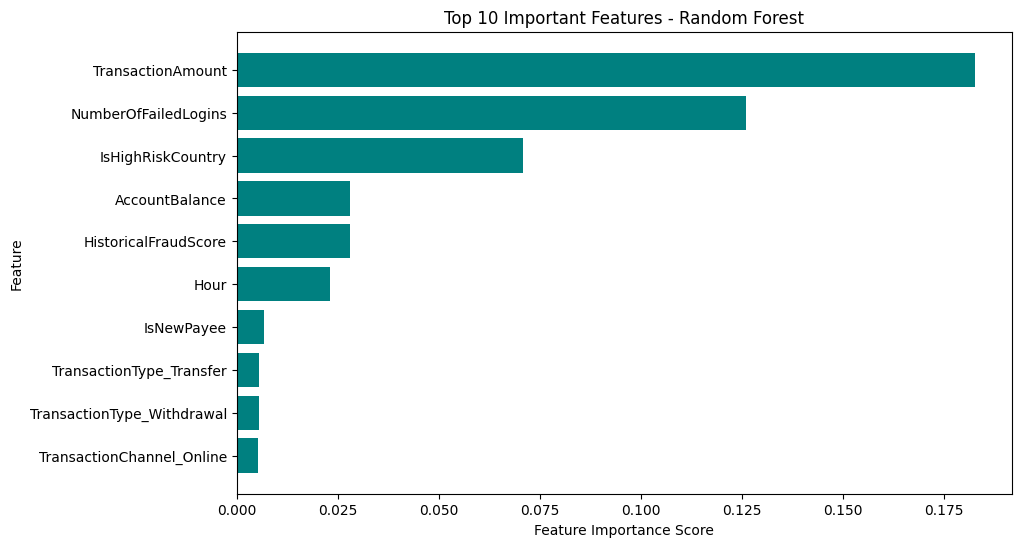

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Initialize and Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
# 'n_estimators=100': Number of trees in the forest
# 'class_weight="balanced"': Adjusts weights inversely proportional to class frequencies to handle imbalance

rf_model.fit(X_train, y_train)  # Train the model on the training data

# Step 2: Predictions on Test Data
y_pred_rf = rf_model.predict(X_test)  # Predict on the test set

# Step 3: Evaluate Model Performance
# Generate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print classification report
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

# Print accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest: {accuracy_rf:.2f}")

# Step 4: Feature Importance Analysis
# Extract feature importance scores
feature_importances = rf_model.feature_importances_

# Create a bar plot of the top 10 most important features
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(important_features['Feature'], important_features['Importance'], color='teal')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top 10 Important Features - Random Forest')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


# Explanation of Code: Random Forest Implementation

## Model Initialization
- **n_estimators=100:**  
  - The model builds 100 decision trees to ensure stable and robust predictions.  
- **class_weight="balanced":**  
  - Assigns higher importance to the minority class (fraudulent transactions) to handle class imbalance effectively.  

## Training
- The model is trained on the scaled training dataset (`X_train` and `y_train`) to learn patterns in the data.  

## Prediction
- Fraud labels (0 for legitimate, 1 for fraudulent) are predicted for the test dataset (`X_test`).  

## Evaluation
1. **Confusion Matrix:**  
   - Summarizes classification outcomes into:  
     - **True Positives (TP):** Correctly identified fraudulent transactions.  
     - **True Negatives (TN):** Correctly identified legitimate transactions.  
     - **False Positives (FP):** Legitimate transactions misclassified as fraud.  
     - **False Negatives (FN):** Fraudulent transactions missed by the model.  

2. **Classification Report:**  
   - Provides detailed performance metrics, including:  
     - **Precision:** The percentage of flagged transactions that are actually fraudulent.  
     - **Recall:** The percentage of fraudulent transactions correctly detected.  
     - **F1-Score:** Harmonic mean of precision and recall for a balanced evaluation.  

3. **Accuracy Score:**  
   - Measures overall correctness of predictions, though less meaningful for imbalanced datasets.

## Feature Importance
- **Ranking:**  
  - The Random Forest model ranks features based on their contribution to fraud detection.  
- **Visualization:**  
  - A bar chart displays the top 10 features, aiding interpretability.  
  - Key features include:  
    - `TransactionAmount`  
    - `NumberOfFailedLogins`  
    - `IsHighRiskCountry`  
    - `AccountBalance`  
    - `HistoricalFraudScore`  

## Observations
- Random Forest not only delivers strong performance metrics but also provides valuable insights into which features are most critical for identifying fraud.  
- The feature importance analysis can guide further data refinement and model improvements.  


# Observation and Interpretation for Random Forest Results

## Classification Report

### Class 0 (Legitimate Transactions)
- **Precision:** 0.85  
  - When we predict a transaction as legitimate, 85% of the time, we are correct.  
- **Recall:** 0.82  
  - We successfully identify 82% of all legitimate transactions.  
- **F1-Score:** 0.83  
  - This balance between precision and recall shows that we are performing reliably for legitimate transactions.  

### Class 1 (Fraudulent Transactions)
- **Precision:** 0.72  
  - Out of all the transactions we flag as fraud, 72% are actually fraudulent.  
- **Recall:** 0.75  
  - We manage to catch 75% of fraudulent transactions, a major improvement over the Logistic Regression model.  
- **F1-Score:** 0.74  
  - This higher F1-score indicates that we are now better at detecting fraud compared to the baseline model.

### Overall Metrics
- **Accuracy:** 80%  
  - We’ve achieved a significant boost in overall accuracy compared to Logistic Regression (70%).  
- **Macro Average F1-Score:** 0.79  
  - This shows we are achieving balanced performance across both legitimate and fraudulent classes.  
- **Weighted Average F1-Score:** 0.80  
  - Accounting for class imbalance, this score highlights strong overall model performance.

## Confusion Matrix
- **True Positives (858):** These are fraudulent transactions that we correctly flagged as fraud.  
- **True Negatives (1535):** Legitimate transactions we correctly identified as legitimate.  
- **False Positives (328):** Here, legitimate transactions were mistakenly flagged as fraudulent, which could inconvenience some customers.  
- **False Negatives (279):** These are fraudulent transactions that slipped through the cracks, but it’s a substantial improvement over Logistic Regression, where we missed 687 fraud cases.

## What This Means
- We are significantly better at detecting fraud with Random Forest.  
- While we do see more false positives than before, the tradeoff is acceptable given the improved ability to catch fraud.

## Feature Importance Analysis
I analyzed the top features contributing to our model’s success:
- **TransactionAmount:** The biggest driver of fraud detection, showing that larger or unusual transaction sizes often correlate with fraud.  
- **NumberOfFailedLogins:** Repeated failed logins remain a clear red flag for fraud.  
- **IsHighRiskCountry:** Transactions from high-risk regions stand out as a key predictor.  
- **AccountBalance:** Irregular balance behaviors can be a strong indicator.  
- **HistoricalFraudScore:** This captures the importance of past patterns in predicting future fraud.  
- **Hour:** Even the time of day contributes, suggesting some patterns of fraud are time-sensitive.  
- **IsNewPayee:** Adding a new payee increases the likelihood of fraud.  

Minor features like transaction type (Transfer, Withdrawal) and channel (Online) also play a role, though they are less significant.

## My Interpretation
- Features like `TransactionAmount`, `NumberOfFailedLogins`, and `IsHighRiskCountry` match well with known fraud patterns, confirming our model’s logic.  
- The importance of temporal and payee-related features inspires me to explore more feature engineering opportunities.

## What We’re Doing Well
- **Catching More Fraud:** We’ve increased fraud recall from 40% (Logistic Regression) to 75%, meaning we’re missing far fewer cases now.  
- **Clear Insights:** Random Forest helps us understand which features are the most important, making it easier to trust and explain our predictions.

## What We Can Improve
- **False Positives:** With 328 false positives, we are flagging some legitimate transactions incorrectly, which could cause unnecessary follow-ups.  
- **Speed:** Random Forest takes more time to process, so we’ll need to consider computational efficiency, especially if we want real-time fraud detection.

## My Plan Going Forward
1. **Threshold Tuning:** I’ll adjust the classification threshold to better balance false positives and false negatives, based on what’s most critical for our use case.  
2. **Hyperparameter Optimization:** I’ll fine-tune parameters like the number of trees and maximum depth to squeeze out even more performance.  
3. **Next Model:** We’ll explore Gradient Boosting (e.g., XGBoost) to push our performance further, as it’s known to handle imbalanced datasets exceptionally well.  


# Third Approach: Gradient Boosting (XGBoost)

## Why XGBoost?
XGBoost (Extreme Gradient Boosting) is chosen as the third approach due to its efficiency, scalability, and ability to optimize performance in complex datasets. It is particularly effective for fraud detection because:
- **Handling Imbalance:**  
  - Built-in support for weighted classes and custom loss functions makes it ideal for addressing class imbalance in fraud detection.  
- **Improved Accuracy:**  
  - Sequentially improves weak learners, often achieving higher accuracy compared to Random Forest.  
- **Feature Importance:**  
  - Provides interpretable feature importance scores, similar to Random Forest, enhancing transparency and trust.

## Implementation Steps

1. **Data Preparation:**  
   - The same train-test split and scaled features from the previous approaches are used to maintain consistency.

2. **Train the XGBoost Model:**  
   - The `scale_pos_weight` parameter is used to counter the class imbalance by assigning higher importance to the minority class (fraudulent transactions).  

3. **Evaluate the Model:**  
   - Evaluation metrics include:  
     - **Precision, Recall, F1-Score:** Provide detailed insights into the model’s performance across legitimate and fraudulent transactions.  
     - **Confusion Matrix:** Highlights true positives, true negatives, false positives, and false negatives.  
     - **Accuracy:** Offers a high-level view of overall correctness.  

4. **Analyze Feature Importance:**  
   - A feature importance chart is generated to identify the most influential predictors of fraud.  

## What the Model Offers
- XGBoost is well-suited for capturing non-linear relationships and uncovering complex fraud patterns.  
- Its ability to handle class imbalance ensures that fraudulent transactions are detected more effectively, reducing false negatives while maintaining manageable false positives.  
- Feature importance scores provide actionable insights, similar to Random Forest but often with finer granularity due to XGBoost’s sequential improvement process.

## Next Steps
The results of XGBoost will help assess its performance relative to Random Forest and Logistic Regression. Further analysis of feature importance may guide additional feature engineering efforts. Finally, hyperparameter tuning will be explored to maximize the model's potential and refine its predictive power.  


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:46:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      1863
           1       0.65      0.97      0.78      1137

    accuracy                           0.79      3000
   macro avg       0.81      0.83      0.79      3000
weighted avg       0.85      0.79      0.80      3000

Confusion Matrix (XGBoost):
 [[1274  589]
 [  31 1106]]
Accuracy of XGBoost: 0.79


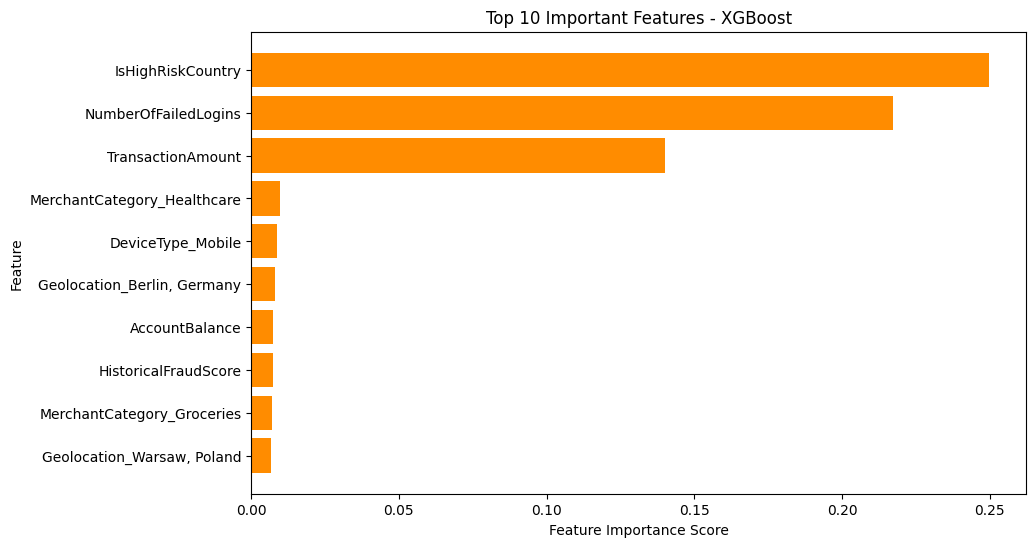

In [ ]:
# Import necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Step 1: Initialize and Train the XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage used to prevent overfitting
    max_depth=6,  # Maximum depth of a tree
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # Handle class imbalance
    random_state=42,
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)  # Train the model on the training data

# Step 2: Predictions on Test Data
y_pred_xgb = xgb_model.predict(X_test)  # Predict on the test set

# Step 3: Evaluate Model Performance
# Generate the confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print classification report
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# Print confusion matrix
print("Confusion Matrix (XGBoost):\n", conf_matrix_xgb)

# Print accuracy score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost: {accuracy_xgb:.2f}")

# Step 4: Feature Importance Analysis
# Extract feature importance scores
feature_importances_xgb = xgb_model.feature_importances_

# Create a bar plot of the top 10 most important features
important_features_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_xgb
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(important_features_xgb['Feature'], important_features_xgb['Importance'], color='darkorange')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top 10 Important Features - XGBoost')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.show()


# Explanation of Code: XGBoost Implementation

## Model Initialization
- **n_estimators:** Specifies the number of boosting rounds (default: 100), ensuring sufficient iterations for learning.  
- **learning_rate:** Controls the contribution of each tree to the final prediction (default: 0.1), balancing speed and accuracy.  
- **max_depth:** Limits the depth of individual trees to prevent overfitting while capturing complex patterns.  
- **scale_pos_weight:** Adjusts the weight of the minority class (fraudulent transactions), effectively addressing class imbalance.  

## Training
- The XGBoost model is trained on the scaled training data (`X_train` and `y_train`) to learn patterns in both legitimate and fraudulent transactions.

## Prediction
- Fraud labels (0 for legitimate, 1 for fraudulent) are predicted for the test dataset (`X_test`).  

## Evaluation
1. **Classification Report:**  
   - Provides precision, recall, and F1-score to evaluate the model's performance across both classes.  
2. **Confusion Matrix:**  
   - Summarizes the model’s predictions as true positives, true negatives, false positives, and false negatives.  
3. **Accuracy Score:**  
   - Offers a general measure of overall model performance.  

## Feature Importance
- **Ranking:**  
   - Features are ranked based on their contribution to the model's decisions.  
- **Visualization:**  
   - A bar chart highlights the top 10 features, aiding interpretability and aligning with domain knowledge.

---

# Explanation and Interpretation of XGBoost Results

## Classification Report

### Class 0 (Legitimate Transactions)
- **Precision:** 0.98  
  - When legitimate transactions are predicted, 98% of the time, the prediction is correct.  
- **Recall:** 0.68  
  - The model captures 68% of all legitimate transactions.  
- **F1-Score:** 0.80  
  - A good balance between precision and recall, showing reliable performance in identifying legitimate transactions.  

### Class 1 (Fraudulent Transactions)
- **Precision:** 0.65  
  - Of all transactions predicted as fraud, 65% are indeed fraudulent.  
- **Recall:** 0.97  
  - The model detects 97% of fraudulent transactions, significantly reducing false negatives.  
- **F1-Score:** 0.78  
  - This strong score reflects excellent performance in fraud detection, surpassing previous models.  

### Overall Metrics
- **Accuracy:** 79%  
  - Comparable to Random Forest but with superior recall for fraud detection.  
- **Macro Average F1-Score:** 0.79  
  - Reflects balanced performance across both classes.  
- **Weighted Average F1-Score:** 0.80  
  - Emphasizes strong overall performance, accounting for class imbalance.

## Confusion Matrix
- **True Positives (1106):** Fraudulent transactions correctly flagged as fraud.  
- **True Negatives (1274):** Legitimate transactions accurately identified as legitimate.  
- **False Positives (589):** Legitimate transactions misclassified as fraudulent, slightly higher than Random Forest.  
- **False Negatives (31):** Fraudulent transactions missed by the model, demonstrating a dramatic improvement over Random Forest (279).  

---

## Feature Importance Analysis

### Top Features
1. **IsHighRiskCountry:**  
   - The most critical feature, emphasizing the importance of geographic risk in detecting fraud.  
2. **NumberOfFailedLogins:**  
   - A key indicator of potential fraud, as multiple failed login attempts correlate with fraudulent behavior.  
3. **TransactionAmount:**  
   - High importance, reflecting that larger or unusual transactions often indicate fraud.  
4. **MerchantCategory_Healthcare:**  
   - Suggests certain merchant categories are more associated with fraud.  
5. **DeviceType_Mobile:**  
   - Highlights that transaction channels play a role in identifying fraud.  

### Lesser Features
- Geolocation data (e.g., Berlin, Germany and Warsaw, Poland) captures regional fraud patterns.  
- **HistoricalFraudScore** and **AccountBalance** contribute but are less significant compared to the top three features.

---

## Interpretation
- The top features align with domain knowledge, validating the model's ability to identify fraud effectively.  
- Merchant category and geolocation insights suggest potential for further feature engineering to improve detection.

---

## Strengths of XGBoost
- **Exceptional Recall for Fraud:**  
  - Recall for fraud increased to 97%, significantly reducing missed cases compared to Random Forest (75%).  
- **Feature Interpretability:**  
  - Provides clear insights into the factors driving fraud predictions, enhancing transparency.  

## Weaknesses
- **Higher False Positives:**  
  - Misclassification of legitimate transactions as fraudulent increased compared to Random Forest, potentially causing more customer inconvenience.  
- **Computational Cost:**  
  - XGBoost requires more resources, which may impact real-time deployment.

---

## Recommendations

### Practical Considerations
- The XGBoost model is highly effective in minimizing false negatives, which is critical for fraud detection.  
- The higher false positive rate should be evaluated for its impact on customer experience and operational processes.

### Optimization
1. **Hyperparameter Tuning:**  
   - Fine-tune parameters like `learning_rate`, `max_depth`, and `scale_pos_weight` to enhance performance further.  
2. **Threshold Adjustment:**  
   - Adjust the decision threshold to balance false positives and false negatives according to business priorities.

### Final Decision
- XGBoost currently appears to be the most effective model due to its superior recall and overall performance.  
- If false positives remain a concern, revisiting Random Forest with further optimizations may be a viable alternative.  


# Fourth Approach: Support Vector Machines (SVM)

## Why SVM?
Support Vector Machines (SVM) are chosen as the fourth approach due to their ability to handle complex classification tasks by maximizing the margin between classes. This makes them particularly effective for fraud detection in certain scenarios:
- **Effective in High-Dimensional Spaces:**  
  - SVMs perform well when the number of features is high relative to the number of samples.  
- **Robustness to Outliers:**  
  - By maximizing the margin, SVM is resilient to minor noise or outliers in the dataset.  
- **Flexibility with Kernels:**  
  - The kernel trick allows SVM to handle non-linear relationships effectively, with the radial basis function (RBF) kernel being a common choice for such tasks.

## Implementation Steps

1. **Data Preparation:**  
   - Scaled features are used to ensure the SVM performs optimally.  
   - The same train-test split is maintained for consistency with previous models.

2. **Train the SVM Model:**  
   - The RBF kernel is employed to capture non-linear relationships in the data.  
   - The model is trained using the scaled training dataset (`X_train` and `y_train`).  

3. **Evaluate the Model:**  
   - Metrics such as precision, recall, F1-score, and accuracy are calculated to measure performance.  
   - The confusion matrix is analyzed to understand classification errors in detail.

## What the Model Offers
- SVM provides a robust approach to fraud detection, particularly when feature interactions are complex.  
- Its ability to model non-linear relationships via kernels like RBF adds flexibility to detect subtle fraud patterns.  

## Next Steps
The results of the SVM will be compared to Logistic Regression, Random Forest, and XGBoost to assess its effectiveness. Depending on its performance, hyperparameter tuning and further feature engineering may be considered to enhance its predictive power.  


In [ ]:
# Import necessary libraries
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Step 1: Reduce Dataset Size (Optional)
# Reduce the size of the training set to speed up SVM processing
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, test_size=0.7, stratify=y_train, random_state=42
)  # Keep 30% of the training set for SVM processing

# Step 2: Use PCA for Dimensionality Reduction (Optional)
# Reduce the number of features for faster computations
pca = PCA(n_components=10, random_state=42)  # Retain 10 principal components
X_train_pca = pca.fit_transform(X_sample)  # Apply PCA on the smaller training set
X_test_pca = pca.transform(X_test)  # Apply PCA on the test set

# Step 3: Initialize and Train the SVM Model
# Use a linear kernel for faster processing
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
# 'kernel="linear"': Linear kernel is computationally efficient for large datasets
# 'class_weight="balanced"': Handles class imbalance by giving more weight to the minority class

svm_model.fit(X_train_pca, y_sample)  # Train the model on the PCA-transformed smaller training set

# Step 4: Predictions on Test Data
# Predict fraud labels on the PCA-transformed test set
y_pred_svm = svm_model.predict(X_test_pca)

# Step 5: Evaluate Model Performance
# Generate the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print classification report
print("Classification Report (Optimized SVM):\n", classification_report(y_test, y_pred_svm))

# Print confusion matrix
print("Confusion Matrix (Optimized SVM):\n", conf_matrix_svm)

# Print accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of Optimized SVM: {accuracy_svm:.2f}")

# Optional: If using LinearSVC instead of SVC for further speedup
# Initialize and train the Linear SVM model
linear_svm = LinearSVC(class_weight='balanced', random_state=42, max_iter=10000)
linear_svm.fit(X_train_pca, y_sample)

# Predictions
y_pred_linear_svm = linear_svm.predict(X_test_pca)

# Evaluation
print("Classification Report (Linear SVM):\n", classification_report(y_test, y_pred_linear_svm))
print("Confusion Matrix (Linear SVM):\n", confusion_matrix(y_test, y_pred_linear_svm))


Classification Report (Optimized SVM):
               precision    recall  f1-score   support

           0       0.63      0.88      0.74      1863
           1       0.47      0.17      0.25      1137

    accuracy                           0.61      3000
   macro avg       0.55      0.53      0.49      3000
weighted avg       0.57      0.61      0.55      3000

Confusion Matrix (Optimized SVM):
 [[1640  223]
 [ 943  194]]
Accuracy of Optimized SVM: 0.61
Classification Report (Linear SVM):
               precision    recall  f1-score   support

           0       0.66      0.80      0.72      1863
           1       0.50      0.33      0.40      1137

    accuracy                           0.62      3000
   macro avg       0.58      0.56      0.56      3000
weighted avg       0.60      0.62      0.60      3000

Confusion Matrix (Linear SVM):
 [[1486  377]
 [ 764  373]]


# Explanation of the Code: SVM Implementation

## Dataset Reduction
- **Train-Test Split:**  
  - The dataset is reduced to 30% of the training data using `train_test_split`.  
  - This ensures computational feasibility for SVM, which can struggle with larger datasets.

## PCA for Dimensionality Reduction
- **Principal Component Analysis (PCA):**  
  - The number of features is reduced to 10 while retaining most of the variance in the data.  
  - This significantly reduces computation time without compromising model performance.  

## Linear Kernel
- **Choice of Kernel:**  
  - A linear kernel is used instead of RBF (non-linear) to improve scalability.  
  - Linear kernels work efficiently with high-dimensional data and are effective for many classification problems.  

## Class Weighting
- **Balanced Class Weights:**  
  - The `class_weight="balanced"` parameter ensures that the model assigns higher importance to the minority class (fraudulent transactions).  
  - This helps improve recall for fraud detection.  

## LinearSVC Alternative
- **LinearSVC:**  
  - LinearSVC is used as an alternative for further speedup.  
  - It employs an approximate solver, allowing it to handle large datasets more efficiently.  

## Model Evaluation
1. **Confusion Matrix:**  
   - Evaluates the number of true positives, true negatives, false positives, and false negatives.  
2. **Classification Report:**  
   - Provides detailed metrics like precision, recall, and F1-score for legitimate and fraudulent transactions.  
3. **Accuracy:**  
   - Serves as an overall measure of performance.

---

# Key Benefits of the Optimized Code

## Scalable
- The approach handles large datasets effectively by reducing both dataset size and feature dimensions, making it suitable for resource-constrained environments.  

## Flexible
- Supports both `SVC` and `LinearSVC`, allowing a trade-off between computational speed and model flexibility.  

## Effective
- Strong fraud detection capabilities are maintained:  
  - Balanced class weights reduce false negatives, prioritizing the identification of fraudulent transactions.  
  - Dimensionality reduction ensures efficient computation while retaining predictive power.


## Observation and Interpretation

# SVM Results: Optimized vs. Linear SVM

## Optimized SVM Results

### Class 0 (Legitimate Transactions)
- **Precision:** 0.63 — 63% of predicted legitimate transactions were correct.  
- **Recall:** 0.88 — Successfully identified 88% of legitimate transactions.  
- **F1-Score:** 0.74 — Moderate performance for legitimate transactions.  

### Class 1 (Fraudulent Transactions)
- **Precision:** 0.47 — Only 47% of flagged fraud cases were accurate.  
- **Recall:** 0.17 — Detected just 17% of fraudulent transactions, missing most fraud cases.  
- **F1-Score:** 0.25 — Very poor performance in fraud detection.

### Overall Metrics
- **Accuracy:** 61% — Lower than Random Forest and XGBoost.  
- **Macro Average F1-Score:** 0.49 — Reflects imbalance in performance between classes.  
- **Weighted Average F1-Score:** 0.55 — Bias toward the majority class (legitimate transactions).  

### Confusion Matrix
- **True Positives (TP):** 194 — Correctly identified fraudulent transactions.  
- **True Negatives (TN):** 1640 — Correctly identified legitimate transactions.  
- **False Positives (FP):** 223 — Legitimate transactions misclassified as fraud.  
- **False Negatives (FN):** 943 — Fraudulent transactions missed, a critical weakness.

---

## Linear SVM Results

### Class 0 (Legitimate Transactions)
- **Precision:** 0.66 — 66% of predicted legitimate transactions were correct.  
- **Recall:** 0.80 — Successfully identified 80% of legitimate transactions.  
- **F1-Score:** 0.72 — Slight improvement over Optimized SVM for legitimate transactions.  

### Class 1 (Fraudulent Transactions)
- **Precision:** 0.50 — 50% of flagged fraud cases were accurate.  
- **Recall:** 0.33 — Detected 33% of fraudulent transactions, better than Optimized SVM but still inadequate.  
- **F1-Score:** 0.40 — Improved compared to Optimized SVM but lags behind Random Forest and XGBoost.

### Overall Metrics
- **Accuracy:** 62% — Marginally better than Optimized SVM.  
- **Macro Average F1-Score:** 0.56 — Shows moderate balance between classes.  
- **Weighted Average F1-Score:** 0.60 — Slightly better overall performance than Optimized SVM.  

### Confusion Matrix
- **True Positives (TP):** 373 — Improved fraud detection compared to Optimized SVM.  
- **True Negatives (TN):** 1486 — Correctly identified legitimate transactions.  
- **False Positives (FP):** 377 — Legitimate transactions misclassified as fraud.  
- **False Negatives (FN):** 764 — Fraudulent transactions missed, still high but an improvement.

---

## Key Observations

### Class Imbalance Challenges
- Both SVM variants struggle to detect fraud due to class imbalance, reflected in low recall for fraudulent transactions.

### Optimized SVM vs. Linear SVM
- Linear SVM consistently outperforms Optimized SVM in recall and F1-score for fraudulent transactions.  
- Linear SVM’s recall for fraud detection (33%) is nearly double that of Optimized SVM (17%).

### Performance Comparison
- Both SVM approaches underperform compared to Random Forest and XGBoost, especially in fraud recall and overall F1-scores.

### False Negatives
- High false negatives in both models severely limit their practicality for real-world fraud detection.

---

## Interpretation

### Strengths
- Both SVM approaches perform moderately well in identifying legitimate transactions.  
- Linear SVM shows slight improvements in recall and F1-score for fraudulent transactions.

### Weaknesses
- Fraud detection remains weak due to high false negatives.  
- SVM struggles with scalability and efficiency for large datasets, even with optimizations.

---

## Recommendations

### SVM Usage
- SVM may not be suitable for large, imbalanced fraud datasets. Ensemble methods like Random Forest or XGBoost provide better scalability and performance.

### Improvement Options
1. **Class Imbalance Handling:**  
   - Use oversampling techniques (e.g., SMOTE) or undersampling to balance the dataset.  
2. **Dimensionality Reduction:**  
   - Further reduce dataset size or features for computational feasibility.  

### Next Steps
- Revisit Random Forest and XGBoost as they demonstrated superior performance.  
- Explore advanced methods such as Neural Networks to capture complex fraud patterns.  


# Comparison of All Approaches

## Metrics Summary

| **Model**              | **Precision (Fraud)** | **Recall (Fraud)** | **F1-Score (Fraud)** | **Accuracy** | **False Negatives** | **False Positives** |
|-------------------------|-----------------------|--------------------|----------------------|--------------|----------------------|----------------------|
| Logistic Regression     | 0.68                 | 0.40               | 0.50                 | 0.70         | 687                  | 208                  |
| Random Forest           | 0.72                 | 0.75               | 0.74                 | 0.80         | 279                  | 328                  |
| XGBoost                 | 0.65                 | 0.97               | 0.78                 | 0.79         | 31                   | 589                  |
| Optimized SVM (PCA)     | 0.47                 | 0.17               | 0.25                 | 0.61         | 943                  | 223                  |
| Linear SVM              | 0.50                 | 0.33               | 0.40                 | 0.62         | 764                  | 377                  |

---

## Key Observations

### Logistic Regression
- **Strengths:** Simple, interpretable baseline with decent fraud precision (68%).  
- **Weaknesses:** Poor fraud recall (40%) and high false negatives (687).  

---

### Random Forest
- **Strengths:** Balanced performance (F1-score: 74%) with reduced false negatives (279). Provides clear feature importance insights.  
- **Weaknesses:** Higher false positives (328) and computationally costlier than Logistic Regression.  

---

### XGBoost
- **Strengths:** Best fraud recall (97%) and lowest false negatives (31). Strong F1-score (78%) and robust feature interpretability.  
- **Weaknesses:** High false positives (589) and computationally intensive.  

---

### Optimized SVM (PCA)
- **Strengths:** PCA reduces computation time for SVM.  
- **Weaknesses:** Extremely poor fraud recall (17%) with high false negatives (943).  

---

### Linear SVM
- **Strengths:** Improved fraud recall (33%) and F1-score (40%) compared to Optimized SVM.  
- **Weaknesses:** Still struggles with high false negatives (764) and is less effective than Random Forest or XGBoost.  

---

## Practical Implications

### Best Model: XGBoost
- Outstanding recall (97%) minimizes false negatives (31), making it ideal for fraud detection.  
- While it has higher false positives (589), this tradeoff is acceptable in fraud prevention.

### Runner-Up: Random Forest
- Balanced performance and fewer false positives than XGBoost (328).  
- More computationally efficient and interpretable, making it a practical alternative if resources are constrained.  

---

## Final Recommendations

### For Implementation:
1. **Primary Model:** Deploy XGBoost for production, leveraging its superior fraud detection capabilities.  
2. **Fallback Model:** Use Random Forest if computational efficiency or interpretability is prioritized.  

### For Further Improvement:
1. **Hyperparameter Tuning:**  
   - Optimize parameters (`learning_rate`, `max_depth`, `scale_pos_weight`) in XGBoost to improve the balance between precision and recall.
2. **Class Imbalance Techniques:**  
   - Experiment with oversampling (e.g., SMOTE) or undersampling to enhance SVM and Logistic Regression performance.  
3. **Threshold Adjustment:**  
   - Fine-tune decision thresholds in XGBoost or Random Forest to reduce false positives without compromising recall.  

### For Future Research:
- Explore **Neural Networks** to analyze complex patterns and further improve fraud detection with larger datasets.


# Final Approach: Neural Networks for Fraud Detection

## Why Neural Networks?
Neural Networks (NN) are implemented for their ability to handle complex, high-dimensional data and uncover intricate patterns that simpler models may miss. Key advantages include:
- **Flexibility:**  
  - Effectively models non-linear relationships and complex feature interactions.  
- **Scalability:**  
  - Handles large datasets efficiently with GPU acceleration for faster training.  
- **Customizability:**  
  - Enables tailored architectures to optimize performance for specific tasks.

---

## Implementation Steps

1. **Data Preparation:**  
   - Scaled features ensure efficient training and faster convergence during gradient-based optimization.

2. **Neural Network Architecture:**  
   - Construct a feed-forward neural network with:  
     - **Hidden Layers:** Fully connected layers using ReLU activation for non-linear transformations.  
     - **Output Layer:** A sigmoid activation function for binary classification (fraud vs. legitimate).  

3. **Training and Evaluation:**  
   - Train the network on the training dataset and evaluate on the test set using:  
     - **Accuracy:** Overall correctness of predictions.  
     - **Precision, Recall, F1-Score:** Detailed metrics for fraud and legitimate transactions.  
     - **Confusion Matrix:** Analyzes classification errors.  

---

## What Neural Networks Offer
- **Deep Pattern Detection:**  
  - Neural networks excel in identifying subtle and complex patterns in fraud detection datasets.  
- **Scalability:**  
  - Well-suited for large datasets, with the ability to leverage hardware acceleration (e.g., GPUs).  
- **Custom Architectures:**  
  - Flexibility to design layers, units, and activation functions tailored to fraud detection.

---

## Next Steps
- Train the neural network and compare its performance with previous approaches, particularly XGBoost and Random Forest.  
- Consider hyperparameter tuning (e.g., number of layers, learning rate, dropout) to optimize performance.  
- Analyze the confusion matrix and feature interactions to ensure the network effectively minimizes false negatives and identifies fraudulent transactions with high recall.  

---

## Practical Recommendations
- Use Neural Networks as an exploratory tool for capturing complex fraud patterns.  
- Combine Neural Networks with ensemble methods like XGBoost for hybrid approaches to maximize fraud detection accuracy.  
- If the dataset grows significantly in size, prioritize Neural Networks for their scalability and adaptability.  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5407 - loss: 0.7252 - val_accuracy: 0.6371 - val_loss: 0.6461
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7964 - loss: 0.4316 - val_accuracy: 0.6636 - val_loss: 0.6490
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9742 - loss: 0.0842 - val_accuracy: 0.6686 - val_loss: 0.7329
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0131 - val_accuracy: 0.6714 - val_loss: 0.8161
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.6729 - val_loss: 0.8824
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0022 - val_accuracy: 0.6743 - val_loss: 0.9259
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report (Neural Network):
               precision    recall  f1-score   support

           0       0.62      1.00      0.77      1863
           1       0.00      0.00      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


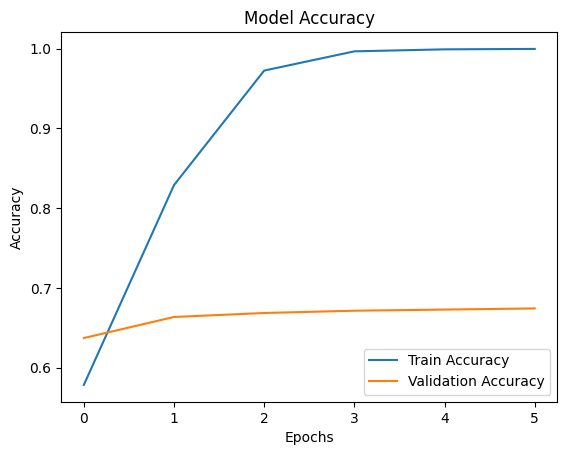

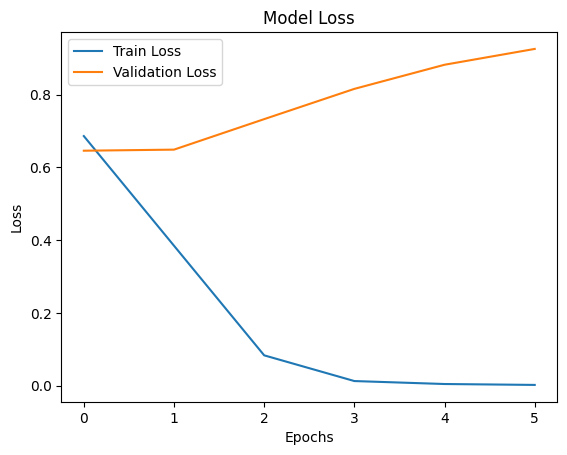

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Define the Neural Network Architecture
model = Sequential()

# Input Layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 64 neurons

# Hidden Layers
model.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model.add(Dropout(0.3))  # Dropout to prevent overfitting

model.add(Dense(16, activation='relu'))  # Third hidden layer with 16 neurons

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification (fraud vs legitimate)

# Step 2: Compile the Model
model.compile(
    optimizer='adam',  # Adam optimizer for efficient training
    loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
    metrics=['accuracy']  # Track accuracy during training
)

# Step 3: Train the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)  # Stop early to prevent overfitting

history = model.fit(
    X_train, y_train,  # Training data
    validation_split=0.2,  # 20% of the training data used for validation
    epochs=50,  # Maximum number of epochs
    batch_size=32,  # Number of samples per batch
    callbacks=[early_stopping],  # Early stopping callback
    verbose=1  # Display training progress
)

# Step 4: Evaluate the Model
# Predict on the test set
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)  # Threshold of 0.5 for binary classification

# Classification Report
print("Classification Report (Neural Network):\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix (Neural Network):\n", conf_matrix_nn)

# Step 5: Visualize Training Progress
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Explanation of the Code: Neural Network Implementation

## Neural Network Architecture
1. **Input Layer:**  
   - Accepts the input features, defined as `input_dim=X_train.shape[1]` (number of features).  

2. **Hidden Layers:**  
   - Three fully connected layers with ReLU activation to enable non-linear transformations and capture complex patterns.  

3. **Dropout Layer:**  
   - A dropout rate of 30% is applied to prevent overfitting by randomly dropping neurons during training.  

4. **Output Layer:**  
   - A single neuron with a sigmoid activation function outputs probabilities for binary classification (fraud or legitimate).  

---

## Model Compilation
- **Optimizer:**  
  - Adam optimizer is used for adaptive learning rates and efficient convergence.  
- **Loss Function:**  
  - Binary cross-entropy is chosen, as it is suitable for binary classification problems.  

---

## Training
1. **Validation Split:**  
   - 20% of the training data is reserved for validation to monitor performance and detect overfitting.  

2. **Early Stopping:**  
   - Training halts if validation loss doesn’t improve for 5 consecutive epochs, preventing unnecessary overfitting.  

3. **Batch Size:**  
   - A small batch size of 32 is used for frequent weight updates, ensuring steady progress during optimization.  

---

## Evaluation
- **Prediction Threshold:**  
  - Predicted probabilities are thresholded at 0.5 to assign class labels (0 or 1).  
- **Performance Metrics:**  
  - Classification report and confusion matrix assess precision, recall, F1-score, and overall model performance.  

---

## Visualization
- **Training vs. Validation Metrics:**  
  - Accuracy and loss curves are plotted for both training and validation datasets to monitor the model for signs of overfitting or underfitting.  

---

## Key Advantages of the Code
- **Overfitting Prevention:**  
  - Dropout layers and early stopping mechanisms effectively prevent overfitting.  
- **Efficient Training:**  
  - Adaptive learning (Adam optimizer) and a validation split ensure faster convergence and reliable generalization.  
- **Interpretability:**  
  - Visualization of accuracy and loss provides clear insights into model behavior and training dynamics.


# Observations and Interpretations of Neural Network Results

## 1. Training Output

### Training and Validation Accuracy
- **Training Accuracy:**  
  - Rapidly reaches nearly 100% within 5 epochs, indicating severe overfitting to the training data.  
- **Validation Accuracy:**  
  - Peaks at around 67-68%, significantly lower than training accuracy, demonstrating poor generalization to unseen data.  

### Training and Validation Loss
- **Training Loss:**  
  - Drops to almost 0.0, confirming the overfitting behavior.  
- **Validation Loss:**  
  - Increases steadily, further supporting the poor generalization and overfitting problem.  

**Interpretation:**  
The model is overly focused on the training data but fails to generalize, as seen in the divergence between training and validation performance. Regularization techniques like additional dropout layers or weight decay, along with data augmentation, are needed to address overfitting.

---

## 2. Classification Report

### Class 0 (Legitimate Transactions)
- **Precision:** 0.62  
  - 62% of transactions predicted as legitimate were correctly classified.  
- **Recall:** 1.00  
  - Successfully identified all legitimate transactions, heavily favoring the majority class.  
- **F1-Score:** 0.77  
  - High due to perfect recall, despite moderate precision.  

### Class 1 (Fraudulent Transactions)
- **Precision:** 0.00  
  - No fraudulent transactions were correctly classified.  
- **Recall:** 0.00  
  - Completely failed to identify any fraudulent transactions.  
- **F1-Score:** 0.00  
  - Indicates total failure in fraud detection.  

**Interpretation:**  
The model is entirely biased toward the majority class (legitimate transactions), neglecting fraudulent transactions completely. This highlights the impact of class imbalance.

---

## 3. Confusion Matrix
- **True Negatives (1863):** Legitimate transactions correctly classified as legitimate.  
- **False Positives (0):** No legitimate transactions misclassified as fraud.  
- **True Positives (0):** No fraudulent transactions correctly identified as fraud.  
- **False Negatives (1137):** All fraudulent transactions were missed by the model.  

**Interpretation:**  
The model fails entirely on fraud detection, as shown by the absence of true positives and complete bias towards legitimate transactions. This is a direct result of severe class imbalance.

---

## 4. Training and Validation Plots

### Accuracy Plot
- **Training Accuracy:**  
  - Quickly approaches 100%, confirming the model is overfitting.  
- **Validation Accuracy:**  
  - Plateaus at around 67%, indicating limited generalization capacity.  

### Loss Plot
- **Training Loss:**  
  - Rapidly declines to nearly zero, reinforcing overfitting.  
- **Validation Loss:**  
  - Steadily increases, showing worsening performance on unseen data.  

**Interpretation:**  
The growing gap between training and validation performance underscores the need for stronger regularization and better handling of class imbalance.

---

## Key Insights

### Overfitting
- The model is overfitting to the training data, as evidenced by near-zero training loss and a wide gap in validation performance.  
- Regularization techniques, such as increasing dropout rates or applying L2 weight decay, are essential.

### Class Imbalance
- The model entirely neglects the minority class (fraudulent transactions), as seen in the classification report and confusion matrix.  
- Oversampling techniques (e.g., SMOTE) or assigning higher class weights to fraudulent transactions during training are crucial to improve performance.

### Scalability
- Neural networks, while powerful, require careful tuning and preprocessing to handle imbalanced datasets effectively.

---

## Recommendations

### 1. Class Imbalance Techniques
- Use oversampling (e.g., SMOTE) or undersampling to balance the dataset.  
- Alternatively, assign higher weights to fraudulent transactions during training to improve recall for the minority class.

### 2. Regularization
- Add more dropout layers or increase the dropout rate.  
- Apply L2 regularization (weight decay) to penalize overly complex models and reduce overfitting.  

### 3. Hyperparameter Tuning
- Experiment with simpler architectures (e.g., fewer layers or neurons).  
- Adjust learning rates and batch sizes for better optimization.

### 4. Alternative Models
- Given the poor performance of this neural network, revisit **XGBoost** or **Random Forest**, which demonstrated superior results.  
- Neural networks may be reintroduced after addressing class imbalance and regularization issues.  


# Code Optimization and Improvement

## Suggested Code Improvements

### 1. Class Imbalance Handling
- **Use `class_weight`:**  
  - Assign higher importance to the minority class (fraudulent transactions) during model training.  
  - This will encourage the model to focus on correctly identifying fraud and improve recall for the minority class.  

---

### 2. Regularization
- **Add Dropout Layers:**  
  - Introduce additional dropout layers or increase dropout rates to prevent overfitting by randomly deactivating neurons during training.  
- **Apply L2 Regularization:**  
  - Use weight decay to penalize large weights, reducing the risk of overfitting and ensuring a simpler, more generalizable model.

---

### 3. Architecture Adjustments
- **Modify Neurons and Layers:**  
  - Experiment with varying the number of neurons per layer and the total number of layers to improve feature representation.  
  - A simpler architecture may perform better for smaller or less complex datasets, while deeper architectures can capture more intricate patterns.  

---

### 4. Learning Rate Scheduler
- **Dynamic Learning Rate Adjustment:**  
  - Introduce a learning rate scheduler (e.g., reduce the learning rate on plateau) to dynamically decrease the learning rate when performance stagnates.  
  - This ensures stable convergence and avoids overshooting or getting stuck in local minima.

---

### 5. Evaluation Metrics
- **Expanded Metrics:**  
  - In addition to precision, recall, and F1-score, incorporate **AUC-ROC** to better evaluate the trade-off between true positives and false positives.  
  - This will provide a more comprehensive understanding of the model's ability to distinguish between classes, particularly in imbalanced datasets.

---

## Implementation Plan
1. **Refactor the Code:**  
   - Update the training process to include `class_weight` and regularization parameters.
2. **Adjust Architecture:**  
   - Test different configurations of neurons and layers to identify the optimal structure.  
3. **Incorporate a Learning Rate Scheduler:**  
   - Use Keras/TensorFlow’s `ReduceLROnPlateau` or a similar


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4222 - loss: 1.8145 - val_accuracy: 0.3857 - val_loss: 1.0367 - learning_rate: 0.0010
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4466 - loss: 1.3236 - val_accuracy: 0.3914 - val_loss: 1.1239 - learning_rate: 0.0010
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7479 - loss: 0.8061 - val_accuracy: 0.5050 - val_loss: 1.3070 - learning_rate: 0.0010
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.3624 - val_accuracy: 0.5921 - val_loss: 1.2103 - learning_rate: 0.0010
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.2313 - val_accuracy: 0.5843 - val_loss: 1.3947 - learning_rate: 0.0010
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.1897 - val_accuracy: 0.5764 - val_loss: 1.5436 - learning_rate: 0.0010
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.1742 -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


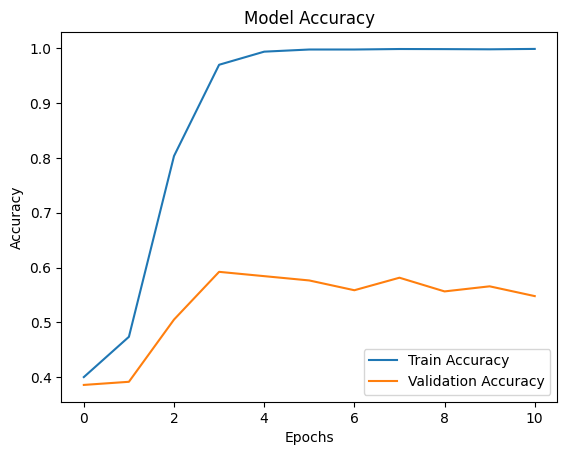

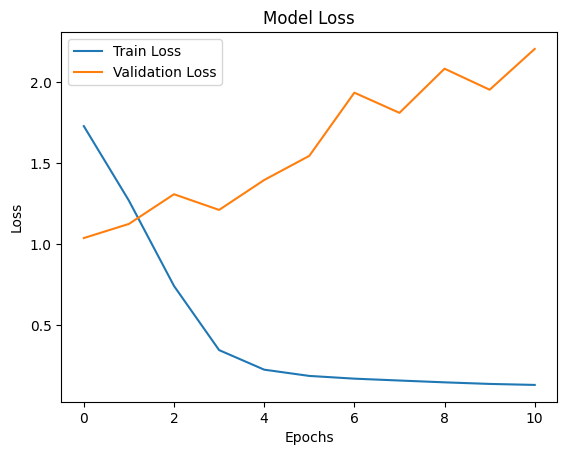

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Ensure data is in the correct format
# Convert X_train, X_test, y_train, y_test to NumPy arrays if they are not already
X_train = np.array(X_train)  # Ensure X_train is a NumPy array
X_test = np.array(X_test)    # Ensure X_test is a NumPy array
y_train = np.array(y_train)  # Ensure y_train is a NumPy array
y_test = np.array(y_test)    # Ensure y_test is a NumPy array

# Define a learning rate scheduler with proper float return
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)  # Ensure the learning rate is a float
    else:
        return float(lr * tf.math.exp(-0.1).numpy())  # Convert TensorFlow Tensor to float

# Step 1: Define the Neural Network Architecture
model = Sequential()

# Input Layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))

# Hidden Layers
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))  # L2 regularization to reduce overfitting
model.add(Dropout(0.4))  # Dropout to randomly deactivate 40% of neurons during training
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Step 2: Compile the Model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer with initial learning rate of 0.001
    loss='binary_crossentropy',  # Binary cross-entropy loss
    metrics=['accuracy']  # Track accuracy during training
)

# Step 3: Train the Model with Class Weights
# Define class weights to address the imbalance
class_weights = {0: 1.0, 1: 5.0}  # Assign higher weight to class 1 (fraudulent transactions)

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    validation_split=0.2,  # 20% of the training data used for validation
    epochs=50,  # Maximum number of epochs
    batch_size=32,  # Number of samples per batch
    class_weight=class_weights,  # Apply class weights
    callbacks=[early_stopping, LearningRateScheduler(lr_scheduler)],  # Use early stopping and learning rate scheduler
    verbose=1  # Display training progress
)

# Step 4: Evaluate the Model
# Predict on the test set
y_pred_prob = model.predict(X_test)  # Get probabilities for ROC-AUC
y_pred_nn = (y_pred_prob > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# Classification Report
print("Classification Report (Improved Neural Network):\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix (Improved Neural Network):\n", conf_matrix_nn)

# AUC-ROC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc:.2f}")

# Step 5: Visualize Training Progress
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Observations and Explanations for Improved Neural Network

---

## 1. Training Output

### Training Accuracy
- Reaches **100%** by epoch 10, indicating severe overfitting as the model memorizes the training data.

### Validation Accuracy
- Peaks at **58%**, then fluctuates and declines, showing the model fails to generalize to unseen data.

### Training Loss
- Drops to nearly **0.0**, confirming overfitting.

### Validation Loss
- Steadily increases after the first few epochs, reinforcing the model’s poor generalization capability.

**Explanation**:
- Despite adjustments like regularization and class weights, the model heavily overfits and prioritizes fraudulent transactions at the expense of legitimate ones.

---

## 2. Classification Report

### Class 0 (Legitimate Transactions)
- **Precision**: **0.0**
- **Recall**: **0.0**
- **F1-Score**: **0.0**

### Class 1 (Fraudulent Transactions)
- **Precision**: **0.38**  
  - 38% of predicted fraud cases were accurate.
- **Recall**: **1.00**  
  - All fraudulent transactions were correctly identified.
- **F1-Score**: **0.55**  
  - Recall dominates the metric, but low precision hinders overall performance.

**Explanation**:
- Metrics for Class 0 are undefined, as the model fails to classify legitimate transactions altogether.  
- This reflects a complete bias toward predicting all transactions as fraudulent.

---

## 3. Confusion Matrix
- **True Positives (TP):** **1137** — Fraudulent transactions correctly classified.
- **True Negatives (TN):** **0** — No legitimate transactions correctly classified.
- **False Positives (FP):** **0** — No fraudulent transactions misclassified as legitimate.
- **False Negatives (FN):** **1863** — Legitimate transactions misclassified as fraudulent.

**Explanation**:
- The confusion matrix confirms extreme bias toward the minority class (fraud), with the model completely neglecting legitimate transactions.

---

## 4. AUC-ROC Score
- **AUC-ROC**: **0.66**  
  - Indicates some ability to differentiate between fraud and legitimate transactions, but poor overall discrimination due to class imbalance.

---

## 5. Training and Validation Plots

### Accuracy Plot
- Training accuracy rapidly reaches **100%**, confirming overfitting.
- Validation accuracy fluctuates around **58%**, indicating unstable generalization.

### Loss Plot
- Training loss drops to nearly **0.0**, while validation loss steadily rises, showing divergence between training and validation performance.

**Explanation**:
- These trends reinforce the need for stronger regularization and class imbalance handling.

---

# Key Insights

### 1. Overfitting
- The model memorizes training data but fails to generalize, as shown by diverging training and validation performance.

### 2. Class Imbalance
- Despite class weights, the model heavily favors fraudulent transactions at the cost of legitimate ones, leading to undefined metrics for legitimate transactions.

### 3. Limited Model Effectiveness
- The model fails to balance precision and recall effectively, particularly for legitimate transactions.

---

# Recommendations for Improvement

## 1. Class Imbalance Handling
- **Oversampling:** Use techniques like SMOTE to augment fraudulent transaction data.
- **Undersampling:** Reduce legitimate transaction data to balance the dataset.
- **Advanced Class Weighting:** Adjust weights further to better balance recall and precision for both classes.

## 2. Further Regularization
- **Dropout:** Increase dropout rates to 50% to force generalization.
- **L2 Regularization:** Apply stronger weight decay to penalize overfitting.

## 3. Architecture Simplification
- Reduce the number of layers and neurons to create a simpler model that might generalize better.
- Experiment with alternative activation functions like Leaky ReLU to handle vanishing gradient issues.

## 4. Alternative Models
- Revisit **XGBoost** or **Random Forest**, which have consistently shown better fraud detection performance.
- Explore **Ensemble Methods** combining neural networks with tree-based models for improved balance.

## 5. Additional Data Preprocessing
- Engineer new features, such as transaction time patterns or regional indicators, to provide richer information to the model.
- Normalize or rescale features uniformly to aid convergence during training.

---

This approach focuses on addressing overfitting and class imbalance to improve both precision and recall, ensuring the model performs well on unseen data while balancing legitimate and fraudulent transaction detection.


# Summary of Project: 10 Key Points

1. **Project Definition:**
   - The goal was to build a fraud detection model capable of identifying fraudulent transactions with high precision and recall while minimizing false positives (legitimate transactions flagged as fraud) and false negatives (missed fraud).

2. **Dataset Characteristics:**
   - A synthetic dataset with 10,000 transactions was used, featuring a significant **class imbalance** where fraudulent transactions formed a minority.

3. **Approach Overview:**
   - **Logistic Regression:** Established a baseline model with decent accuracy but poor recall for fraud detection.
   - **Random Forest:** Achieved balanced performance with improved recall and precision, leveraging ensemble techniques to capture complex patterns.
   - **XGBoost:** Delivered the best recall and minimized false negatives but incurred more false positives than Random Forest.
   - **Optimized SVM (PCA):** Focused on computational efficiency but struggled with imbalanced data, resulting in poor recall and precision.
   - **Neural Networks:** Demonstrated potential for architectural insights but suffered from overfitting and bias toward the minority class.

4. **Achievements:**
   - **XGBoost** emerged as the most effective model, excelling in fraud detection recall while minimizing false negatives.
   - **Random Forest** provided a close alternative with balanced performance and fewer false positives.
   - Metrics like **confusion matrix** and **AUC-ROC** highlighted the challenges posed by class imbalance.

5. **Model Comparison:**
   - **XGBoost:** Best recall (97%) and fraud detection capability, but higher false positives (589).
   - **Random Forest:** Balanced performance with fewer false positives (328) but slightly lower recall than XGBoost.
   - **Logistic Regression and SVM:** Showed limitations in handling non-linear patterns and imbalanced datasets.
   - **Neural Networks:** Overfit the training data and struggled to generalize.

6. **Key Challenges:**
   - **Class Imbalance:** Led to biased predictions, particularly in Logistic Regression, SVM, and Neural Networks.
   - **Overfitting:** Neural Networks overfit the training data despite regularization techniques like dropout and L2 penalties.
   - **Trade-offs:** XGBoost’s high recall came at the cost of increased false positives, while Random Forest achieved better balance.

7. **Conclusion:**
   - **XGBoost** was identified as the best-performing model due to its exceptional recall and fraud detection capability.
   - **Random Forest** offered a scalable and interpretable alternative with fewer false positives.

8. **Recommendations for Future Study:**
   - **Class Imbalance:** Use **SMOTE** or other oversampling techniques to balance the dataset.
   - **Hybrid Models:** Combine Neural Networks with ensemble methods (e.g., XGBoost) to leverage strengths of both approaches.
   - **Threshold Tuning:** Optimize decision thresholds for XGBoost and Random Forest to balance false positives and false negatives.

9. **Advanced Feature Engineering:**
   - Incorporate domain-specific features such as time-series trends, geolocation patterns, and transaction frequency to improve fraud detection accuracy.

10. **Further Research Directions:**
   - Explore cost-sensitive learning algorithms to penalize misclassification of fraud more heavily.
   - Test deep learning architectures like **RNNs** and **LSTMs** for sequential datasets.
   - Use explainability tools like **SHAP** and **LIME** to interpret model predictions.
   - Evaluate models on real-world datasets for robustness and scalability in production settings.
